In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/train_small.csv", header=0)

array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>],
       [<AxesSubplot:title={'center':'3.0'}>, <AxesSubplot:>]],
      dtype=object)

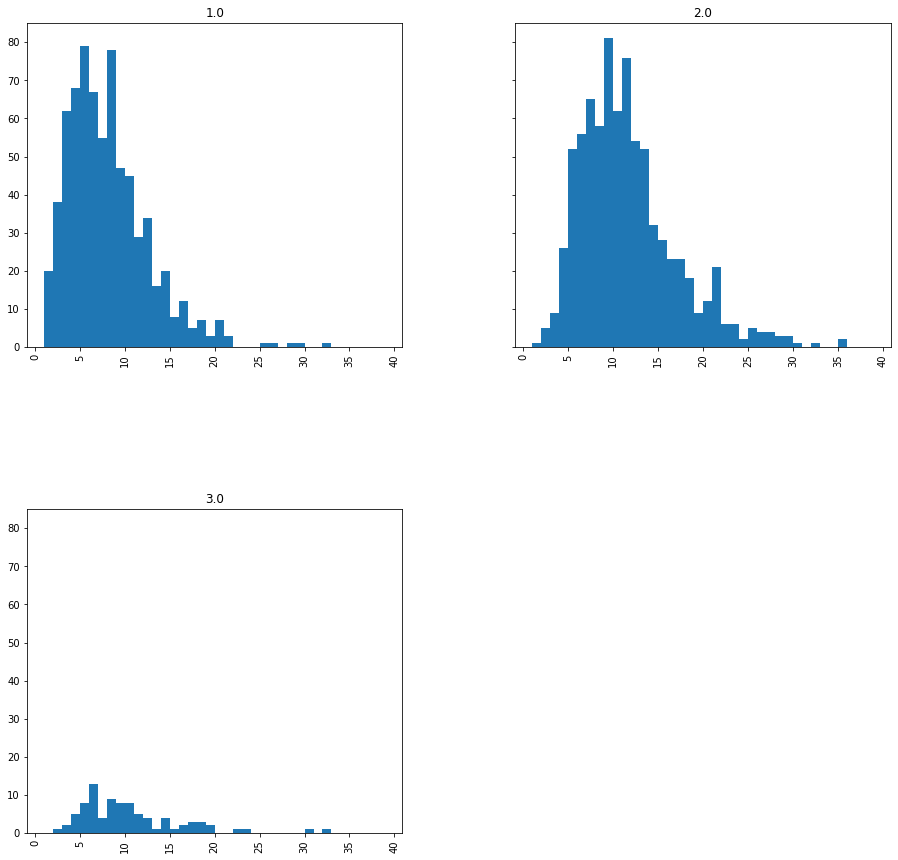

In [3]:
train['n_steps'].hist(by=train['duration_label'], bins=[i for i in range(1, 40)], figsize=(15,15), sharey=True)

array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>],
       [<AxesSubplot:title={'center':'3.0'}>, <AxesSubplot:>]],
      dtype=object)

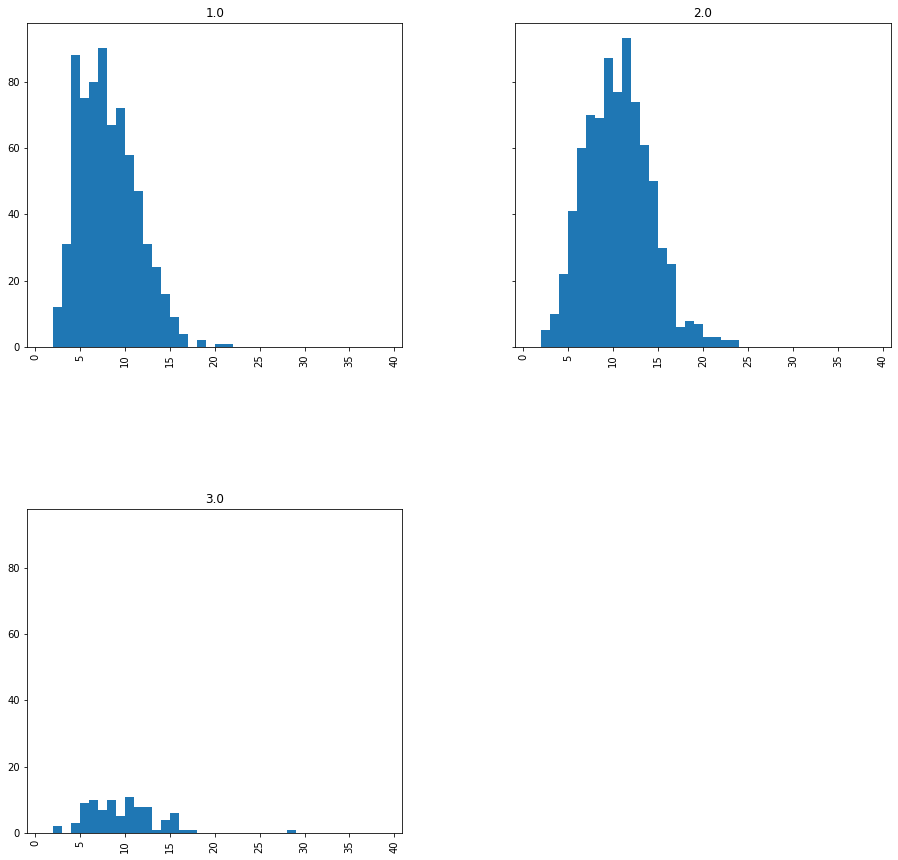

In [4]:
train['n_ingredients'].hist(by=train['duration_label'], bins=[i for i in range(1, 40)], figsize=(15,15), sharey=True)

array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>],
       [<AxesSubplot:title={'center':'3.0'}>, <AxesSubplot:>]],
      dtype=object)

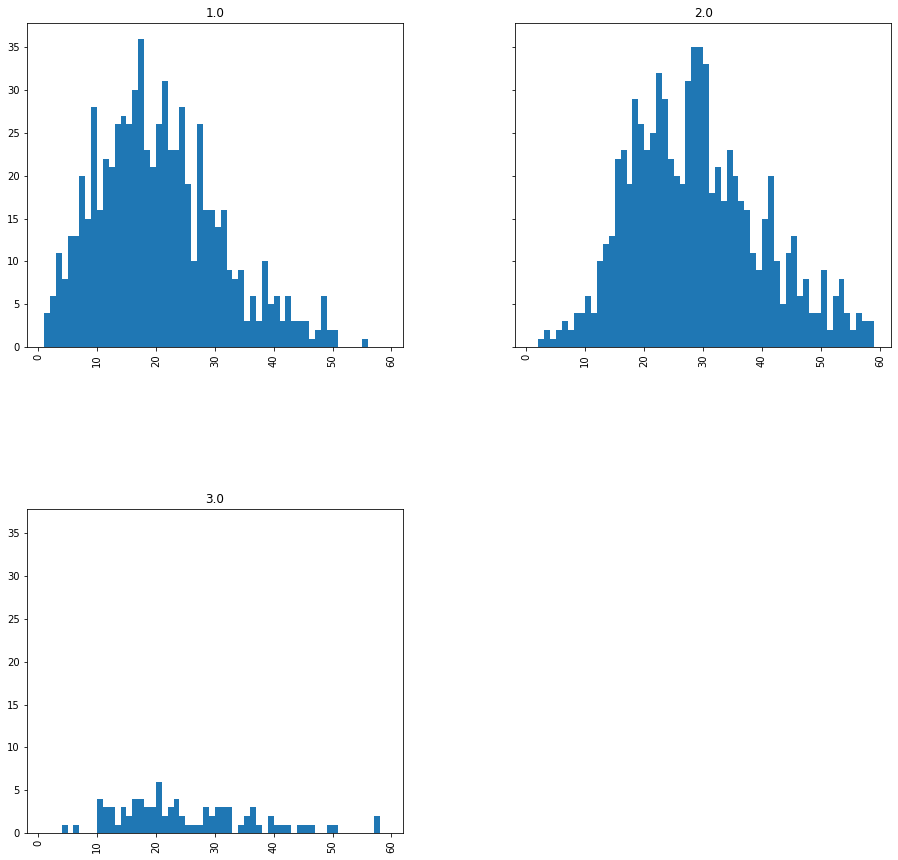

In [6]:
train['n_verbs'].hist(by=train['duration_label'], bins=[i for i in range(1, 60)], figsize=(15,15), sharey=True)

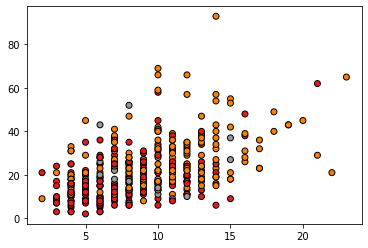

In [8]:
X = train.iloc[:400]
plt.scatter(X.loc[:,'n_ingredients'], X.loc[:,'n_verbs'], c=X['duration_label'], cmap=plt.cm.Set1, edgecolor='k')

In [3]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

train = pd.read_csv("data/recipe_train.csv", header=0)
step = train['steps'].apply(lambda steps: tokenizer.tokenize(steps)).apply(lambda steps: [lemmatizer.lemmatize(word, pos='v') for word in steps])

In [4]:
print(step)

0        [in, saucepan, melt, margarine, and, combine, ...
1        [melt, 1, tbs, butter, in, a, small, saucepan,...
2        [brown, grind, beef, onion, and, green, pepper...
3        [brown, chicken, in, oil, combine, all, ingred...
4        [set, almond, bark, aside, mix, remain, ingred...
                               ...                        
39995    [in, a, measure, cup, combine, sour, cream, an...
39996    [preheat, oven, to, 350, degrees, add, potatoe...
39997    [place, the, kiwifruit, pomegranate, seed, avo...
39998    [in, a, large, deep, fry, pan, heat, oil, over...
39999    [mix, all, ingredients, in, a, saucepan, and, ...
Name: steps, Length: 40000, dtype: object


In [5]:
h = ['hours', 'hour', 'hr', 'h', 'hrs']
print(len([j for i in step for j in i if j in h]))

9102


In [6]:
len([i for i in step for j in i if j in h])

9102

In [7]:
len([i for i in step if any(j in h for j in i)])

7473

In [8]:
target = step.apply(lambda x: any(i in h for i in x))
num = target[target].index

In [9]:
train.iloc[num].groupby(by='duration_label').count()

,Unnamed: 0,name,n_steps,n_ingredients,steps,ingredients,1R_predicted
duration_label,,,,,,,
1.0,1594,1594,1594,1594,1594,1594,1594
2.0,4053,4053,4053,4053,4053,4053,4053
3.0,1826,1826,1826,1826,1826,1826,1826


In [10]:
train.groupby(by='duration_label').count()

,Unnamed: 0,name,n_steps,n_ingredients,steps,ingredients,1R_predicted
duration_label,,,,,,,
1.0,17705,17705,17705,17705,17705,17705,17705
2.0,20246,20246,20246,20246,20246,20246,20246
3.0,2049,2049,2049,2049,2049,2049,2049


In [11]:
hours = step[num].apply(lambda x: [x[i-1:i+1][0] for i in range(len(x)) if x[i] in h])

In [52]:
values = sorted(set([j for i in hours for j in i]))
print(values)

['1', '10', '11', '12', '13', '14', '15', '16', '18', '19', '1st', '2', '20', '24', '25', '3', '36', '4', '48', '5', '6', '60', '7', '72', '8', '9', 'a', 'about', 'additional', 'an', 'and', 'another', 'approximately1', 'bake', 'chill', 'couple', 'ea', 'each', 'eight', 'every', 'few', 'final', 'first', 'five', 'for', 'four', 'full', 'further', 'good', 'half', 'hour', 'i', 'l', 'last', 'least', 'least2', 'least4', 'leave', 'make', 'medium', 'more', 'next', 'of', 'on', 'one', 'per', 'pork', 'seven', 'several', 'six', 'smoot', 'the', 'these', 'three', 'top', 'tracy', 'twelve', 'two', 'wit']


In [59]:
s_dict = {"one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10, "eleven": 11, "twelve": 12,
              "a": 1, "an": 1, "another": 1, "about": 1, "l": 1, "i": 1, "half": 0.5}
def standarize(value):
    if type(value)==int or value.isnumeric():
        return int(value)
    elif any(i.isnumeric() for i in value):
        return [i for i in value if i.isnumeric()][-1]
    elif value in s_dict.keys():
        return s_dict[value]
    else:
        pass


v = [standarize(value) for value in values]
frame = pd.DataFrame([values, v]).transpose()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(frame)
    
# "half an hour"?

                 0     1
0                1     1
1               10    10
2               11    11
3               12    12
4               13    13
5               14    14
6               15    15
7               16    16
8               18    18
9               19    19
10             1st     1
11               2     2
12              20    20
13              24    24
14              25    25
15               3     3
16              36    36
17               4     4
18              48    48
19               5     5
20               6     6
21              60    60
22               7     7
23              72    72
24               8     8
25               9     9
26               a     1
27           about     1
28      additional  None
29              an     1
30             and  None
31         another     1
32  approximately1     1
33            bake  None
34           chill  None
35          couple  None
36              ea  None
37            each  None
38           eight     8


In [56]:
target = [i for i in hours.index if 'several' in hours[i]]

In [57]:
train.iloc[target]['duration_label'].groupby(train['duration_label']).count()

duration_label
1.0    10
2.0     4
3.0    37
Name: duration_label, dtype: int64